# Marketing Case Study

This data is from a retail food company, serving nearly one million cusomuers a year. They sell products from five major categories: wine, rare meat products, exotic fruits, specially prepared fish, and sweet products.

This company has three sales channels for consumers to acquire products: physical stores, catalogues, and the company's website. The company has solid revenues and a healthy bottom line in the last three years, but the profit growth perspectives for the next three years are not as promising. One strategic initiative is to improve the performance of marketing activities with a focus on marketing campaigns.

## Data Exploration

A key objective of data exploration is to provide a better understanding of the characteristic features of respondents.

A second key objective of data exploration is to provide and describe a customer segmentation based on customer behaviours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
# load data
with open("./data/marketing_data.csv", "r") as f:
    data = pd.read_csv(f)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Data Types for Income and Dt_Customer features

The income feature name has extra spaces and was classified as an object type.
Looking at the csv file also shows that the values contain an extra space at the end also.

In [5]:
# remove spaces in "Income" feature name
data.rename(columns={" Income ":"Income"}, inplace=True)

# how many missing values
print(data.Income.isnull().sum())

24


In [10]:
# warnings.filterwarnings("ignore")

data['Income'] = data['Income'].str.replace("$","").str.replace(",","")
data['Income'] = data['Income'].astype(float)

/var/folders/nx/ng8f1kmx73bfpg9ftm8kz5b80000gn/T/ipykernel_8847/447856886.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace("$","").str.replace(",","")


In [ ]:
# data.iloc[262,:]

ID                           1994
Year_Birth                   1983
Education              Graduation
Marital_Status            Married
Income                        NaN
Kidhome                         1
Teenhome                        0
Dt_Customer              11/15/13
Recency                        11
MntWines                        5
MntFruits                       5
MntMeatProducts                 6
MntFishProducts                 0
MntSweetProducts                2
MntGoldProds                    1
NumDealsPurchases               1
NumWebPurchases                 1
NumCatalogPurchases             0
NumStorePurchases               2
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Response                        0
Complain                        0
Country                        US
Name: 262, dtype: object

In [12]:
# change Dt_Customer column to a datetime column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')

In [13]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


This dataset contains 27 features and the target of response, which indicates whether or not the customer accepted the offer in the last campaign.

Customer Profiles

This dataset contains various characteristics features of the customers, including:

Categorical
- Education (ordinal)
- Marital status (nominal)

Numerical
- Year of birth (discrete)
- Dependents: Kidhome, Teenhome (discrete)
- Income (continuous)
- Dt_Customer (discrete)

date the customer enrolled with the company's loyalty program 

Start by graphing the two categorical features

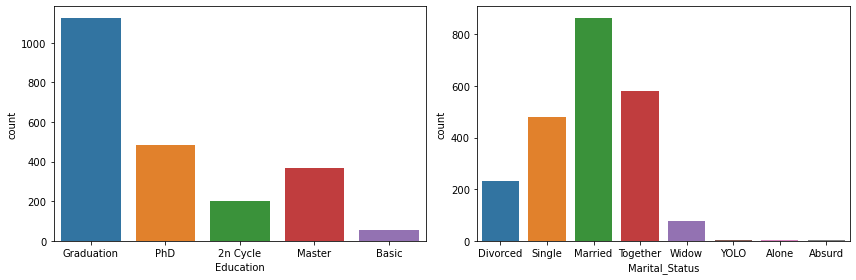

In [14]:
# Graph categorical features
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.countplot(x = "Education", data=data, ax=ax[0])
sns.countplot(x = "Marital_Status", data=data,  ax=ax[1])
plt.tight_layout()
plt.show()

There are some categories that could be grouped together in the marital status category.

In [16]:
solo_status = ['YOLO', 'Alone', 'Absurd']
data['Marital_Status'] = data['Marital_Status'].replace(solo_status, 'Single')
print(data.Marital_Status.unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow']


Distribution of Continuous variables

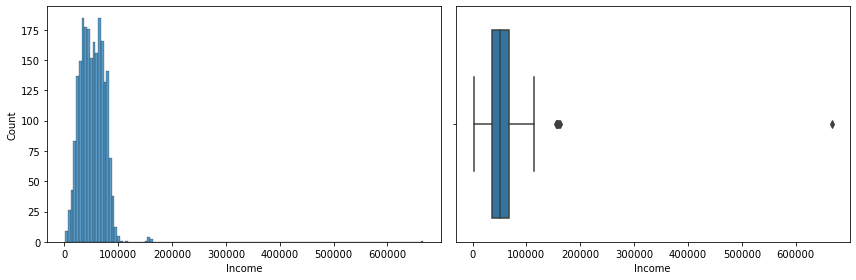

In [19]:
# plot income
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Income", data=data, ax=ax[0])
sns.boxplot(x="Income", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

In [25]:
data[data['Income'] > 160000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
497,1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,55,...,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,85,...,1,1,0,0,0,0,0,0,0,SP


Although there are some values that are outliers based on this dataset, the values aren't unreasonable for income values and will be kept.

Total Monetary Value

In [27]:
data['Mnt_Total'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] \
    + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Mnt_Total
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,91


In [23]:
def get_mnt_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Mnt' in col]

mnt_cols = get_mnt_cols(data)
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

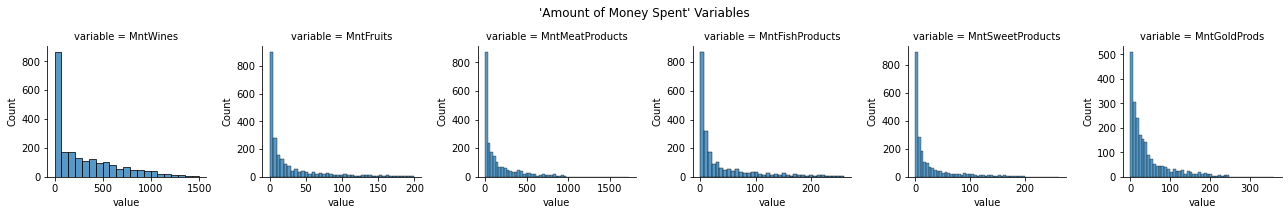

In [38]:
df_mnt = data[mnt_cols]

# plot the mnt columns using seaborn's facetgrid
# inspired by DataCamp's Customer Segmentation Template
graph = sns.FacetGrid(
    df_mnt.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle("'Amount of Money Spent' Variables")
plt.show()

This data will need to be transformed to adjust for the skewness.

In [ ]:
# Feature engineering
# Build new data_seg df to use for segmentation

# calculate age of customer
data_seg['Age'] = 2022 - data['Year_Birth']

# create dependents feature for kid and teen at home


# calculate how long customer has been part of loyalty program

In [ ]:
# one-hot-encode education


# one-hot encode marital status



In [ ]:
# Check that all the columns are numeric
all([pd.api.types.is_numeric_dtype(data[col]) for col in columns_for_clustering])

## Pre-Processing Data

Performing customer segmentation using machine learning requires some preprocessing of the data.
- First, if the data are skewed, then the data needs to be transformed
- Next, the data are centered and scaled using StandardScaler() method.

In [ ]:
#